# Demographics in Mexico 2020

## 1. Dependencies and set up

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import seaborn as sns
import math
import statistics
import scipy.stats

In [2]:
#Download from: https://www.inegi.org.mx/programas/ccpv/2020/#Datos_abiertos

path_2020 = os.path.join('..', 'demographic info', '3_cleanDatabase.csv')

In [3]:
df_semifinal= pd.read_csv(path_2020,low_memory=False,encoding='utf-8-sig')

#note: use utf-8-sig beacuse of spanish characters
#https://datascience.stackexchange.com/questions/12343/pandas-read-csv-with-spanish-characters

In [4]:
path_timeseries = os.path.join('..', 'demographic info', '4_timeline.csv')
df_timeseries= pd.read_csv(path_timeseries,low_memory=False,encoding='utf-8-sig')

In [5]:
df_semifinal.head()

,Unnamed: 0,REGION,NOM_ENT_MUN,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,NOM_ENT_MUN_LOC,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"Aguascalientes , Aguascalientes , Aguascalientes",...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
1,1,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"Aguascalientes , Aguascalientes , Granja Adelita",...,0,0,0,0,0,0,0,0,0,1
2,2,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"Aguascalientes , Aguascalientes , Agua Azul",...,11,4,5,2,1,0,1,6,0,1
3,3,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],"Aguascalientes , Aguascalientes , Los Arbolito...",...,0,0,0,0,0,0,0,0,0,1
4,4,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,Aguascalientes,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),"Aguascalientes , Aguascalientes , Ardillas de ...",...,0,0,0,0,0,0,0,0,0,1


# 3 Analysis

## 3.1 By region

#### The analysis will start by region. There are 4 main regions: North, Centre North, Centre, South

In [6]:
# STYLiNG PANDAS  https://pbpython.com/styling-pandas.html

In [7]:
TotalPopulation = df_semifinal['POBTOT'].sum()
TotalPopulationFemales = df_semifinal['POBFEM'].sum()
TotalPopulationMales = df_semifinal['POBMAS'].sum()
TotalPopulation,TotalPopulationFemales,TotalPopulationMales,TotalPopulationFemales-TotalPopulationMales

(126014024, 64382441, 61234104, 3148337)

In [8]:
df_byregion_II= df_semifinal.groupby('REGION',as_index=False).sum()
df_byregion_II.head()

,REGION,Unnamed: 0,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,CENTRO,2845329246,484038,1511578,4368094,47718379,24651355,23024947,2032604,1004668,...,11529953,7301907,5178314,2631172,1676859,438054,962785,5082603,182181,55762
1,CENTRO NORTE,4897210990,848990,1674965,20092214,26591884,13496903,12965621,1283089,634216,...,6596933,3887337,3720564,1409434,909729,272648,492919,3062026,107805,65569
2,NORTE,3290115080,594014,989923,33631798,22914677,11457436,11351297,1007683,497278,...,6265206,4227269,3276472,1759453,1069056,203699,304467,2211144,65547,45570
3,SUR,6909491280,1243144,6906681,26643000,28789084,14776747,13892239,1423387,704113,...,6311220,2877268,3005669,813379,389635,853129,1386515,4671397,484901,96375


In [9]:
#adding percentage of population vs. total population

df_byregion_II["%TOTALPOP"]=df_byregion_II["POBTOT"]/TotalPopulation
df_byregion_II["%TOTALFEM"]=df_byregion_II["POBFEM"]/TotalPopulation
df_byregion_II["%TOTALMAS"]=df_byregion_II["POBMAS"]/TotalPopulation
#df_byregion_II

### 4.1.1 by gender and region

In [10]:
Per_fem_OverPop= TotalPopulationFemales/TotalPopulation
Per_mas_OverPop= TotalPopulationMales/TotalPopulation
Per_fem_OverPop,Per_mas_OverPop,Per_fem_OverPop-Per_mas_OverPop

(0.5109148883302068, 0.4859308675040803, 0.024984020826126496)

In [11]:
df_byregion_II_summary=df_byregion_II[["REGION",'POBTOT',"POBFEM","POBMAS"]]
df_byregion_II_summary.style.format({"POBTOT": "{:,}", 
                          "POBFEM": "{:,}", 
                          "POBMAS": "{:,}"})


,REGION,POBTOT,POBFEM,POBMAS
0,CENTRO,"47,718,379","24,651,355","23,024,947"
1,CENTRO NORTE,"26,591,884","13,496,903","12,965,621"
2,NORTE,"22,914,677","11,457,436","11,351,297"
3,SUR,"28,789,084","14,776,747","13,892,239"


In [12]:
#import squarify    # pip install squarify (algorithm for treemap)
# plot it

#color = ['red', 'green', 'blue', 'orange']
#sizes=df_byregion_II_summary['POBTOT']
#squarify.plot(sizes, label=df_byregion_II_summary['REGION'], alpha=.8,color=color )
#plt.axis('off')
#plt.show()



In [87]:
#https://plotly.com/python/treemaps/

import plotly.express as px
df = df_byregion_II_summary
fig = px.treemap(df, path=[px.Constant("Mexico"), 'REGION'], 
                 values='POBTOT', color='REGION',color_discrete_map={'(?)':'lightgrey', 'CENTRO':'darkcyan', 'SUR':'lightcyan','CENTRO NORTE':'cadetblue', 'NORTE':'teal'})
fig.update_layout(margin = dict(t=50, l=30, r=50, b=25))
fig.show()



In [14]:
# % over total population
#df_byregion_II[["REGION","%TOTALPOP","%TOTALFEM","%TOTALMAS"]].style.format({"%TOTALPOP": "{:.2%}", "%TOTALFEM": "{:.2%}", "%TOTALMAS": "{:.2%}"})
df_per_region=df_byregion_II[["REGION","%TOTALPOP","%TOTALFEM","%TOTALMAS"]]
df_per_region

,REGION,%TOTALPOP,%TOTALFEM,%TOTALMAS
0,CENTRO,0.38,0.20,0.18
1,CENTRO NORTE,0.21,0.11,0.10
2,NORTE,0.18,0.09,0.09
3,SUR,0.23,0.12,0.11


In [15]:
#marekko chart
#y = df_per_region["%TOTALPOP"]
#x_label = df_per_region["REGION"]
#plt.bar(x_label,df_per_region["%TOTALFEM"] ) # bottom bar
#plt.bar(x_label,df_per_region["%TOTALMAS"], bottom=x_label ) # top bar
#plt.ylim(0,1)
#plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
#plt.show()

In [16]:

# adding 5 of population vs total population of the region
df_byregion_II["%FEM_REGION"]=df_byregion_II["POBFEM"]/df_byregion_II["POBTOT"]
df_byregion_II["%MAS_REGION"]=df_byregion_II["POBMAS"]/df_byregion_II["POBTOT"]


In [17]:
# % sobre region mas + fem = tot por cada region, lueog diferencia (tabla 1)
df_byregion_II[["REGION","%FEM_REGION","%MAS_REGION"]].style.format({"%FEM_REGION":"{:.4%}","%MAS_REGION": "{:.4%}"})

,REGION,%FEM_REGION,%MAS_REGION
0,CENTRO,51.6601%,48.2517%
1,CENTRO NORTE,50.7557%,48.7578%
2,NORTE,50.0004%,49.5372%
3,SUR,51.3276%,48.2552%


In [18]:
##  4graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [24]:
# edad y region (tabla 2 y transpose)
df_bygender= df_semifinal.groupby('REGION',as_index=False).sum()
df_bygender

,REGION,Unnamed: 0,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,CENTRO,2845329246,484038,1511578,4368094,47718379,24651355,23024947,2032604,1004668,...,11529953,7301907,5178314,2631172,1676859,438054,962785,5082603,182181,55762
1,CENTRO NORTE,4897210990,848990,1674965,20092214,26591884,13496903,12965621,1283089,634216,...,6596933,3887337,3720564,1409434,909729,272648,492919,3062026,107805,65569
2,NORTE,3290115080,594014,989923,33631798,22914677,11457436,11351297,1007683,497278,...,6265206,4227269,3276472,1759453,1069056,203699,304467,2211144,65547,45570
3,SUR,6909491280,1243144,6906681,26643000,28789084,14776747,13892239,1423387,704113,...,6311220,2877268,3005669,813379,389635,853129,1386515,4671397,484901,96375


In [25]:
# backsolve population from ages 25 a 59
df_bygender["P_25A59"]=df_bygender["POBTOT"]-df_bygender["P_0A2"]-df_bygender["P_3A5"]-df_bygender["P_6A11"]-df_bygender["P_12A14"]-df_bygender["P_15A17"]-df_bygender["P_18A24"]-df_bygender["P_60YMAS"]


### 4.1. 2 By age

### timeseries

In [19]:
df_timeseries.head()

,Unnamed: 0,NOM_ENT,Grupo quinquenal de edad,AÑO,Total,Hombres,Mujeres,REGION
0,0,Aguascalientes,No especificado,1990,2245,1084,1161,CENTRO NORTE
1,1,Aguascalientes,No especificado,1995,1254,607,647,CENTRO NORTE
2,2,Aguascalientes,No especificado,2000,102,44,58,CENTRO NORTE
3,3,Aguascalientes,No especificado,2005,98,41,57,CENTRO NORTE
4,4,Aguascalientes,No especificado,2010,109,45,64,CENTRO NORTE


In [20]:
#df_timeseries.info()
df_timeseries.columns.drop("Unnamed: 0")

Index(['NOM_ENT', 'Grupo quinquenal de edad', 'AÑO', 'Total', 'Hombres',
       'Mujeres', 'REGION'],
      dtype='object')

In [21]:
df_byregion_timeseries= df_timeseries.groupby(['REGION',"Grupo quinquenal de edad","AÑO"],as_index=False).sum()
df_byregion_timeseries.sort_values("AÑO")

,REGION,Grupo quinquenal de edad,AÑO,Unnamed: 0,Total,Hombres,Mujeres
0,CENTRO,0 a 4 años,1990,17926,3789141,1917789,1871352
96,CENTRO,75 a 79 años,1990,17158,218675,96327,122348
510,SUR,90 a 94 años,1990,19236,23399,10652,12747
252,CENTRO NORTE,95 a 99 años,1990,18936,9318,3989,5329
258,CENTRO NORTE,No especificado,1990,18876,135587,65843,69744
...,...,...,...,...,...,...,...
311,NORTE,35 a 39 años,2020,11556,1666211,833251,832960
317,NORTE,40 a 44 años,2020,11520,1606303,796837,809466
323,NORTE,45 a 49 años,2020,11484,1530629,764197,766432
335,NORTE,50 a 54 años,2020,11412,1336070,657971,678099


In [22]:
df_region_2020=df_byregion_timeseries[df_byregion_timeseries["AÑO"]== 2020 ]
df_region_2020

,REGION,Grupo quinquenal de edad,AÑO,Unnamed: 0,Total,Hombres,Mujeres
5,CENTRO,0 a 4 años,2020,17966,3555896,1796867,1759029
11,CENTRO,10 a 14 años,2020,17918,3992359,2022522,1969837
17,CENTRO,100 años y más,2020,17870,5935,1794,4141
23,CENTRO,15 a 19 años,2020,17822,4044854,2045871,1998983
29,CENTRO,20 a 24 años,2020,17774,3964306,1967921,1996385
...,...,...,...,...,...,...,...
503,SUR,80 a 84 años,2020,19372,279508,129955,149553
509,SUR,85 a 89 años,2020,19324,162931,73548,89383
515,SUR,90 a 94 años,2020,19276,64579,28331,36248
521,SUR,95 a 99 años,2020,19228,25472,10760,14712


In [23]:
df_region_2020.to_csv("prueba.csv")

In [63]:
byage=df_timeseries.groupby(["Grupo quinquenal de edad","AÑO"],as_index=False).sum()
byage_2020=byage[byage["AÑO"]== 2020 ]
byage_2020_II=byage_2020[["Grupo quinquenal de edad","Hombres","Mujeres"]]
byage_2020_II

,Grupo quinquenal de edad,Hombres,Mujeres
5,0 a 4 años,5077482,4969883
11,10 a 14 años,5554260,5389280
17,100 años y más,6644,11651
23,15 a 19 años,5462150,5344540
29,20 a 24 años,5165884,5256211
35,25 a 29 años,4861404,5131597
41,30 a 34 años,4527726,4893101
47,35 a 39 años,4331530,4688746
53,40 a 44 años,4062304,4441282
59,45 a 49 años,3812344,4130069


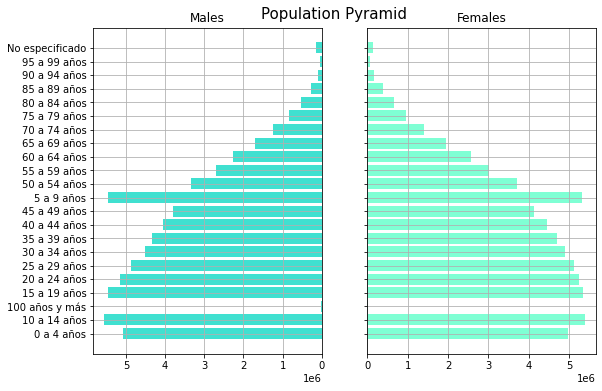

In [78]:
#define x and y limits
y = range(0, len(byage_2020_II))
x_male = byage_2020_II['Hombres']
x_female = byage_2020_II['Mujeres']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('white')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='turquoise')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='aquamarine')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=byage_2020_II['Grupo quinquenal de edad'])
axes[0].invert_xaxis()
axes[0].grid()

plt.savefig('piramide.png')
#display plot
plt.show()

In [26]:
#traspose
df_bygender[["REGION","POBTOT",'P_0A2','P_3A5','P_6A11','P_12A14','P_15A17','P_18A24',"P_25A59",'P_60YMAS']].transpose()

,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
POBTOT,47718379,26591884,22914677,28789084
P_0A2,2032604,1283089,1007683,1423387
P_3A5,2297538,1408916,1153537,1584293
P_6A11,4649263,2817743,2284409,3200503
P_12A14,2395987,1393756,1155976,1579052
P_15A17,2422254,1378301,1134537,1540221
P_18A24,5580721,3124641,2737217,3249341
P_25A59,22464020,11967877,10872761,12790082
P_60YMAS,5875992,3217561,2568557,3422205


In [27]:
##  5graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

## age and region

In [124]:
byageregion=df_timeseries.groupby(["Grupo quinquenal de edad","REGION","AÑO"],as_index=False).sum()
byageregion_2020=byageregion[byageregion["AÑO"]== 2020 ]
byageregion_2020
byageregion_2020_II=byageregion_2020[["Grupo quinquenal de edad","REGION","Total","Hombres","Mujeres"]]
byageregion_2020_II.drop(byageregion_2020_II[byageregion_2020_II["Grupo quinquenal de edad"]== "100 años y más"].index,inplace=True)
byageregion_2020_II.drop(byageregion_2020_II[byageregion_2020_II["Grupo quinquenal de edad"]== "No especificado"].index,inplace=True)


byageregion_2020_II

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Grupo quinquenal de edad,REGION,Total,Hombres,Mujeres
5,0 a 4 años,CENTRO,3555896,1796867,1759029
11,0 a 4 años,CENTRO NORTE,2230131,1127558,1102573
17,0 a 4 años,NORTE,1782093,901419,880674
23,0 a 4 años,SUR,2479245,1251638,1227607
29,10 a 14 años,CENTRO,3992359,2022522,1969837
...,...,...,...,...,...
479,90 a 94 años,SUR,64579,28331,36248
485,95 a 99 años,CENTRO,36626,12825,23801
491,95 a 99 años,CENTRO NORTE,21905,8864,13041
497,95 a 99 años,NORTE,11202,4166,7036


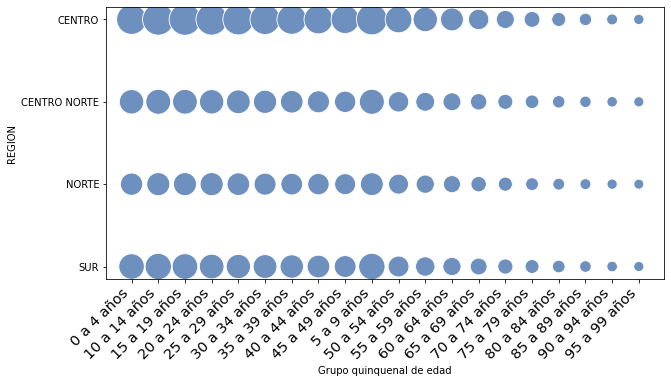

In [138]:


# use the scatterplot function to build the bubble map
plt.figure(figsize=(10,5))
sns.set_palette("vlag")
chart_bubble=sns.scatterplot(data=byageregion_2020_II, x="Grupo quinquenal de edad", y="REGION", size="Total", legend=False, sizes=(100, 1000),palette='magma')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')


plt.savefig('bubble.png')
plt.show()




### 4.1. 3 By age and gender

#### by age % over nation

In [28]:
# por edad % sobre nacional

df_bygender["%NAC_P_0A2"]=df_bygender["P_0A2"]/TotalPopulation
df_bygender["%NAC_P_3A5"]=df_bygender["P_3A5"]/TotalPopulation
df_bygender["%NAC_P_6A11"]=df_bygender["P_6A11"]/TotalPopulation
df_bygender["%NAC_P_12A14"]=df_bygender["P_12A14"]/TotalPopulation
df_bygender["%NAC_P_15A17"]=df_bygender["P_15A17"]/TotalPopulation
df_bygender["%NAC_P_18A24"]=df_bygender["P_18A24"]/TotalPopulation
df_bygender["%NAC_P_25A59"]=df_bygender["P_25A59"]/TotalPopulation
df_bygender["%NAC_P_60YMAS"]=df_bygender["P_60YMAS"]/TotalPopulation

In [29]:
df_bygender[["REGION",'%NAC_P_0A2','%NAC_P_3A5','%NAC_P_6A11','%NAC_P_12A14','%NAC_P_15A17','%NAC_P_18A24',"%NAC_P_25A59",'%NAC_P_60YMAS']].transpose()

,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
%NAC_P_0A2,0.02,0.01,0.01,0.01
%NAC_P_3A5,0.02,0.01,0.01,0.01
%NAC_P_6A11,0.04,0.02,0.02,0.03
%NAC_P_12A14,0.02,0.01,0.01,0.01
%NAC_P_15A17,0.02,0.01,0.01,0.01
%NAC_P_18A24,0.04,0.02,0.02,0.03
%NAC_P_25A59,0.18,0.09,0.09,0.10
%NAC_P_60YMAS,0.05,0.03,0.02,0.03


In [30]:
##  6graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

#### by age % over region

In [31]:
df_bygender["%REG_P_0A2"]=df_bygender["P_0A2"]/df_bygender["POBTOT"]
df_bygender["%REG_P_3A5"]=df_bygender["P_3A5"]/df_bygender["POBTOT"]
df_bygender["%REG_P_6A11"]=df_bygender["P_6A11"]/df_bygender["POBTOT"]
df_bygender["%REG_P_12A14"]=df_bygender["P_12A14"]/df_bygender["POBTOT"]
df_bygender["%REG_P_15A17"]=df_bygender["P_15A17"]/df_bygender["POBTOT"]
df_bygender["%REG_P_18A24"]=df_bygender["P_18A24"]/df_bygender["POBTOT"]
df_bygender["%REG_P_25A59"]=df_bygender["P_25A59"]/df_bygender["POBTOT"]
df_bygender["%REG_P_60YMAS"]=df_bygender["P_60YMAS"]/df_bygender["POBTOT"]

In [32]:
df_bygender[["REGION",'%REG_P_0A2','%REG_P_3A5','%REG_P_6A11','%REG_P_12A14','%REG_P_15A17','%REG_P_18A24',"%REG_P_25A59",'%REG_P_60YMAS']].transpose()


,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
%REG_P_0A2,0.04,0.05,0.04,0.05
%REG_P_3A5,0.05,0.05,0.05,0.06
%REG_P_6A11,0.10,0.11,0.10,0.11
%REG_P_12A14,0.05,0.05,0.05,0.05
%REG_P_15A17,0.05,0.05,0.05,0.05
%REG_P_18A24,0.12,0.12,0.12,0.11
%REG_P_25A59,0.47,0.45,0.47,0.44
%REG_P_60YMAS,0.12,0.12,0.11,0.12


In [33]:
##  7graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

### 4.1. 2.2 By age and region and gender

In [34]:
df_bygender["P_25A59_F"]=df_bygender["POBFEM"]-df_bygender["P_0A2_F"]-df_bygender["P_3A5_F"]-df_bygender["P_6A11_F"]-df_bygender["P_12A14_F"]-df_bygender["P_15A17_F"]-df_bygender["P_18A24_F"]-df_bygender["P_60YMAS_F"]
df_bygender["P_25A59_M"]=df_bygender["POBMAS"]-df_bygender["P_0A2_M"]-df_bygender["P_3A5_M"]-df_bygender["P_6A11_M"]-df_bygender["P_12A14_M"]-df_bygender["P_15A17_M"]-df_bygender["P_18A24_M"]-df_bygender["P_60YMAS_M"]
#df_bygender[["REGION","P_25A59_F","P_25A59_M"]]

In [35]:
#Femenina
df_bygender[['REGION','P_0A2_F','P_3A5_F','P_6A11_F','P_12A14_F','P_15A17_F','P_18A24_F','P_25A59_F','P_60YMAS_F']].transpose()

,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
P_0A2_F,1004668,634216,497278,704113
P_3A5_F,1135093,695889,569497,784288
P_6A11_F,2291488,1387080,1122359,1581172
P_12A14_F,1186665,686300,568365,779908
P_15A17_F,1194423,680126,556076,763588
P_18A24_F,2798573,1568332,1353166,1660644
P_25A59_F,11809486,6135637,5421474,6695801
P_60YMAS_F,3230959,1709323,1369221,1807233


In [36]:
##  8graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [37]:
#Masculina
df_bygender[['REGION','P_0A2_M','P_3A5_M','P_6A11_M','P_12A14_M','P_15A17_M','P_18A24_M','P_25A59_M','P_60YMAS_M']].transpose()

,0,1,2,3
REGION,CENTRO,CENTRO NORTE,NORTE,SUR
P_0A2_M,1027936,648873,510405,719274
P_3A5_M,1162445,713027,584040,800005
P_6A11_M,2357775,1430663,1162050,1619331
P_12A14_M,1209322,707456,587611,799144
P_15A17_M,1227831,698175,578461,776633
P_18A24_M,2782148,1556309,1384051,1588697
P_25A59_M,10612457,5702880,5345343,5974183
P_60YMAS_M,2645033,1508238,1199336,1614972


In [38]:
##  9graph !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [39]:
##  10graph !!!!!!!!!!!!!!!!!!!!!!!!!!!  dif fem -masc

In [40]:
# checar el error en p25 a 59
# dif  tabla fem - tabla mas

In [41]:
# 1 % de segmento de edad / totpob
# mismo pero fem
#mismo pero mas
#piramide interactiva. (5 años, 10 años)

### 4.1.4 viven en el estado que nacieron

In [42]:
df_byregion_II[["REGION","PNACENT","PNACENT_F","PNACENT_M"]]

,REGION,PNACENT,PNACENT_F,PNACENT_M
0,CENTRO,37130088,19048757,18081331
1,CENTRO NORTE,22605075,11541020,11064055
2,NORTE,17359297,8728079,8631218
3,SUR,25334299,13073455,12260844


In [43]:
df_byregion_II["%_PNACENT"]=df_byregion_II["PNACENT"]/df_byregion_II["POBTOT"]
df_byregion_II["%_PNACENT_F"]=df_byregion_II["PNACENT_F"]/df_byregion_II["POBFEM"]
df_byregion_II["%_PNACENT_M"]=df_byregion_II["PNACENT_M"]/df_byregion_II["POBMAS"]
df_byregion_II[["REGION","%_PNACENT","%_PNACENT_F","%_PNACENT_M"]]

,REGION,%_PNACENT,%_PNACENT_F,%_PNACENT_M
0,CENTRO,0.78,0.77,0.79
1,CENTRO NORTE,0.85,0.86,0.85
2,NORTE,0.76,0.76,0.76
3,SUR,0.88,0.88,0.88


In [44]:
##  11graph !!!!!!!!!!!!!!!!!!!!!!!!!!!  grafica conmbinada


### 4.1.5 estatus marital

In [45]:
df_byregion_II[["REGION","P12YM_SOLT","P12YM_CASA","P12YM_SEPA"]]

,REGION,P12YM_SOLT,P12YM_CASA,P12YM_SEPA
0,CENTRO,13655806,20222594,4723744
1,CENTRO NORTE,7187740,11246322,2432620
2,NORTE,6166637,9920963,2208020
3,SUR,7257903,12452790,2655836


In [46]:
df_byregion_II["SUMA_MARITAL"]=df_byregion_II["P12YM_SOLT"]+df_byregion_II["P12YM_CASA"]+df_byregion_II["P12YM_SEPA"]
df_byregion_II["%_SOLTERO"]=df_byregion_II["P12YM_SOLT"]/df_byregion_II["SUMA_MARITAL"]
df_byregion_II["%_CASADO"]=df_byregion_II["P12YM_CASA"]/df_byregion_II["SUMA_MARITAL"]
df_byregion_II["%_SEPARADO"]=df_byregion_II["P12YM_SEPA"]/df_byregion_II["SUMA_MARITAL"]

df_byregion_II[["REGION","SUMA_MARITAL","%_SOLTERO","%_CASADO","%_SEPARADO"]]

,REGION,SUMA_MARITAL,%_SOLTERO,%_CASADO,%_SEPARADO
0,CENTRO,38602144,0.35,0.52,0.12
1,CENTRO NORTE,20866682,0.34,0.54,0.12
2,NORTE,18295620,0.34,0.54,0.12
3,SUR,22366529,0.32,0.56,0.12


In [47]:
##  12graph !!!!!!!!!!!!!!!!!!!!!!!!!!!  grafica conmbinada

### 4.1.6 religion

In [48]:
df_byregion_II[["REGION","PCATOLICA","PRO_CRIEVA","POTRAS_REL","PSIN_RELIG"]]

,REGION,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG
0,CENTRO,38509562,3620507,148496,5238970
1,CENTRO NORTE,22870926,1685632,37901,1756052
2,NORTE,16470031,3136855,20414,3081254
3,SUR,19713858,5605958,39566,3192164


In [49]:
df_byregion_II["SUMA_RELIGION"]=df_byregion_II["PCATOLICA"]+df_byregion_II["PRO_CRIEVA"]+df_byregion_II["POTRAS_REL"]+df_byregion_II["PSIN_RELIG"]
df_byregion_II["%_CATOLICO"]=df_byregion_II["PCATOLICA"]/df_byregion_II["SUMA_RELIGION"]
df_byregion_II["%_CRISTIANO"]=df_byregion_II["PRO_CRIEVA"]/df_byregion_II["SUMA_RELIGION"]
df_byregion_II["%_OTRAS"]=df_byregion_II["POTRAS_REL"]/df_byregion_II["SUMA_RELIGION"]
df_byregion_II["%_SIN_RELIGION"]=df_byregion_II["PSIN_RELIG"]/df_byregion_II["SUMA_RELIGION"]

df_byregion_II[["REGION","SUMA_RELIGION","%_CATOLICO","%_CRISTIANO","%_OTRAS","%_SIN_RELIGION"]]

,REGION,SUMA_RELIGION,%_CATOLICO,%_CRISTIANO,%_OTRAS,%_SIN_RELIGION
0,CENTRO,47517535,0.81,0.08,0.00,0.11
1,CENTRO NORTE,26350511,0.87,0.06,0.00,0.07
2,NORTE,22708554,0.73,0.14,0.00,0.14
3,SUR,28551546,0.69,0.20,0.00,0.11


In [50]:
##  13graph !!!!!!!!!!!!!!!!!!!!!!!!!!!  grafica conmbinada

### 4.1.9 vivienda